In [204]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [205]:
# loading the dataset

df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [206]:
# checking the shape

df.shape

(5572, 5)

# 1. Data Cleaning

In [207]:
# dropping the duplicates

print('Duplicates : ',len(df[df.duplicated()]))
df.drop_duplicates(inplace = True)
print('Shape of the Dataset after removing duplicates : ',df.shape)

Duplicates :  403
Shape of the Dataset after removing duplicates :  (5169, 5)


In [208]:
# dropping the unwanted columns

df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [209]:
# checking for null values

df.isnull().sum()

v1    0
v2    0
dtype: int64

In [210]:
# renaming the columns

df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [211]:
# Applying Label Encoder on the target column

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['target'] = encode.fit_transform(df['target'])
df.head()

# 0 ---> ham
# 1 ---> spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 2. EDA

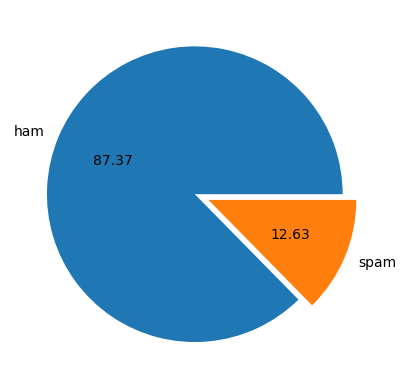

In [212]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f', explode = [0,0.1])
plt.show()

Since the number of data for spam is less then the number of data for ham , this dataset is a unbalanced dataset

In [213]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [214]:
# counting the number of characters

df['num_char'] = df['text'].apply(lambda x: len(x))
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [215]:
# counting the number of words

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [216]:
# counting the number of sentence

df['num_sen'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [217]:
# ham message

df[df['target'] == 0][['num_char', 'num_words', 'num_sen']].describe()

,num_char,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


we can see from the above data that, on an average the ham message contains 71 charcters, 17 words and 2 sentence

In [218]:
# spam message

df[df['target'] == 1][['num_char', 'num_words', 'num_sen']].describe()

,num_char,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


we can see from the above data that, on an average the spam message contains 29 charcters, 6 words and 2 sentence

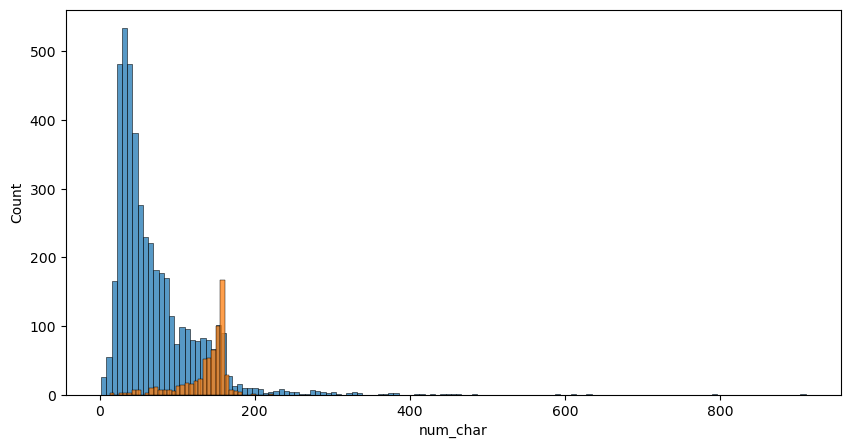

In [219]:
# plotting the number of characters 

plt.figure(figsize = (10,5))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'])
plt.show()

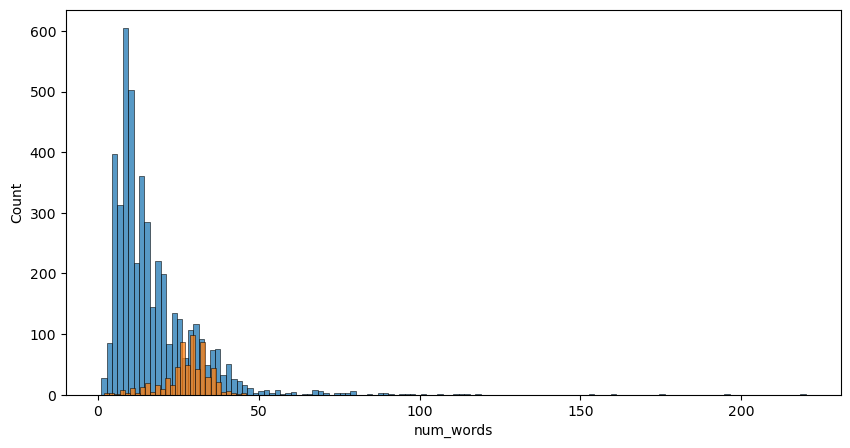

In [220]:
# plotting the number of words

plt.figure(figsize = (10,5))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])
plt.show()

# 3. Data Preprocessing

In [221]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [222]:
# function to perform stemming on the text 

def stemming(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(porter.stem(i))
    return ' '.join(y)

In [223]:
# creating a new column

df['transformed_text'] = df['text'].apply(stemming)
df.head()

,target,text,num_char,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [224]:
# using wordcloud to see the important words used int the message

from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

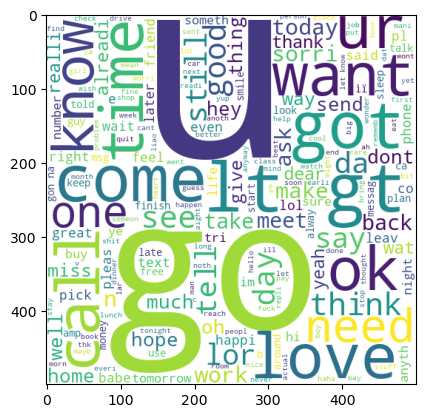

In [225]:
# most words in ham message

ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = ' '))
plt.imshow(ham_wc)
plt.show()

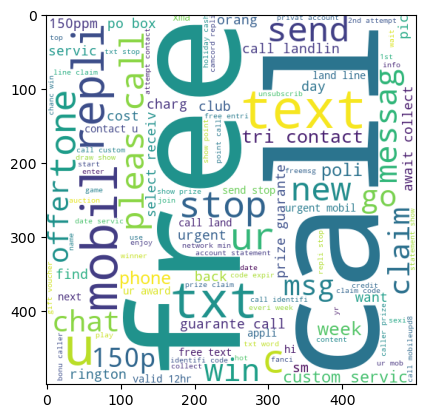

In [226]:
# most words in spam message

spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = ' '))
plt.imshow(spam_wc)
plt.show()

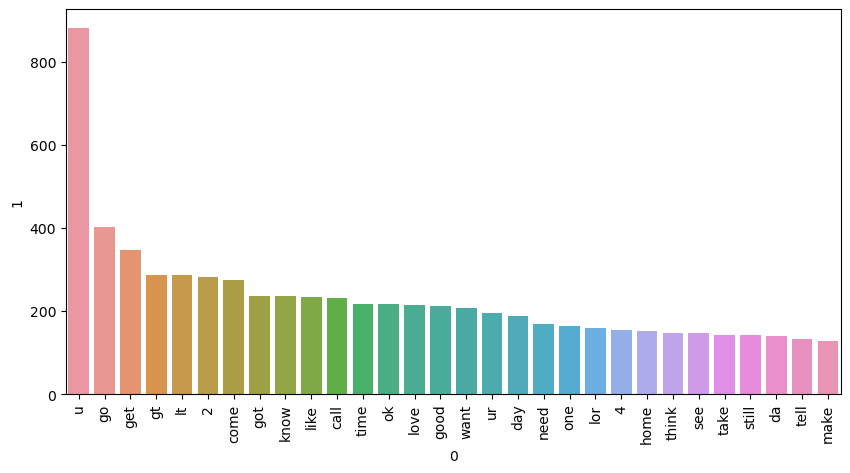

In [227]:
# To see the most comman words in ham

from collections import Counter

ham = []
for i in df[df['target']==0]['transformed_text'].tolist():
    for j in i.split():
        ham.append(j)
        
plt.figure(figsize = (10,5))
sns.barplot(data = pd.DataFrame(Counter(ham).most_common(30)), x = 0, y = 1)
plt.xticks(rotation = 'vertical')
plt.show()

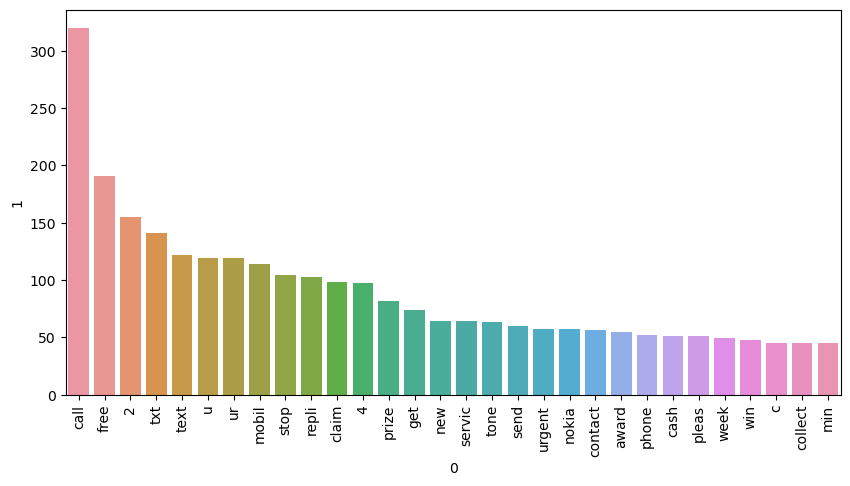

In [228]:
# To see the most comman words in spam

spam = []
for i in df[df['target']==1]['transformed_text'].tolist():
    for j in i.split():
        spam.append(j)
        
      
plt.figure(figsize = (10,5))
sns.barplot(data = pd.DataFrame(Counter(spam).most_common(30)), x = 0, y = 1)
plt.xticks(rotation = 'vertical')
plt.show()

# 4. Model Building

In [229]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features = 3000)

In [230]:
# splitting the feature and target column

X = tf.fit_transform(df['transformed_text']).toarray()
Y = df['target'].values

In [231]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [232]:
logi = LogisticRegression()
knn = KNeighborsClassifier()
rand = RandomForestClassifier()
gauss = GaussianNB()
multi = MultinomialNB()
base = BernoulliNB()

models = {'Logistic Regression': logi, 
          'K Neighbors Classifier': knn,
          'Random Forest Classifier': rand,
          'Gaussian NB': gauss,
          'Multinomial NB': multi,
          'Bernoulli NB': base
         }

In [233]:
def model_training(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


acc_score = []
pre_score = []

for i, j in models.items():
    
    current_accuracy,current_precision = model_training(j, X_train,Y_train,X_test,Y_test)
    print()
    print(i,'\n')
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    acc_score.append(current_accuracy)
    pre_score.append(current_precision)


Logistic Regression 

Accuracy -  0.9564796905222437
Precision -  0.979381443298969

K Neighbors Classifier 

Accuracy -  0.9052224371373307
Precision -  1.0

Random Forest Classifier 

Accuracy -  0.9748549323017408
Precision -  0.9827586206896551

Gaussian NB 

Accuracy -  0.8694390715667312
Precision -  0.5068493150684932

Multinomial NB 

Accuracy -  0.9709864603481625
Precision -  1.0

Bernoulli NB 

Accuracy -  0.9835589941972921
Precision -  0.991869918699187


In [234]:
model_result = pd.DataFrame({'Algorithms': models.keys(), 'Accuracy': acc_score, 'Precision': pre_score})
model_result

,Algorithms,Accuracy,Precision
0,Logistic Regression,0.956480,0.979381
1,K Neighbors Classifier,0.905222,1.000000
2,Random Forest Classifier,0.974855,0.982759
3,Gaussian NB,0.869439,0.506849
4,Multinomial NB,0.970986,1.000000
5,Bernoulli NB,0.983559,0.991870


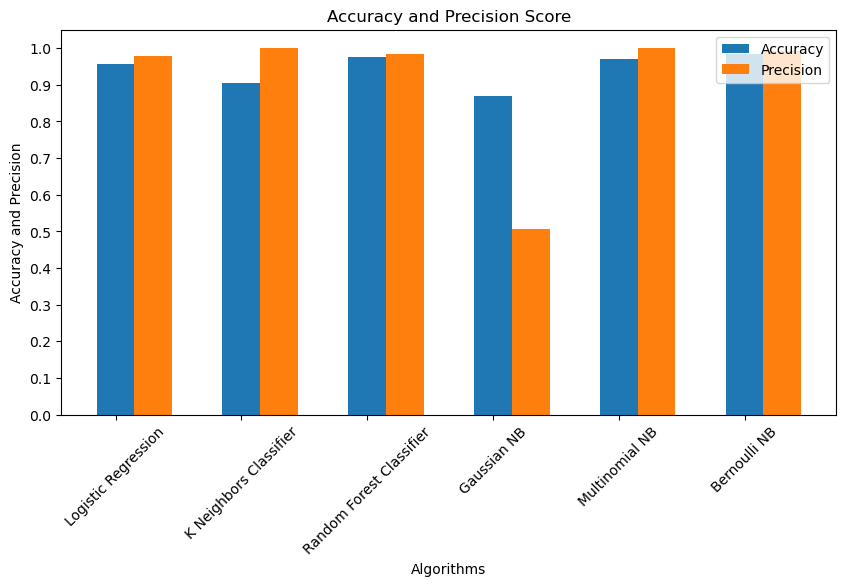

In [235]:
# plotting the accuracy and precision score

value = np.arange(len(model_result['Algorithms']))
width=0.3

plt.figure(figsize = (10, 5))
plt.bar(value, model_result['Accuracy'], width = width, label = 'Accuracy')
plt.bar(value + width, model_result['Precision'], width = width, label = 'Precision')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy and Precision')
plt.title('Accuracy and Precision Score')
plt.xticks(value, model_result['Algorithms']) 
plt.xticks(rotation = 45)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(loc = 'upper right')
plt.show()

Comparing all the algorithms, MultinomialNB has the highest precision score and accuracy score. So we select that algorithm for model building.

In [236]:
# Multinomial NB

multi.fit(X_train, Y_train)
pre = multi.predict(X_test)
print(accuracy_score(Y_test, pre))
print(confusion_matrix(Y_test, pre))
print(precision_score(Y_test, pre))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [203]:
import pickle
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(multi, open('model.pkl', 'wb'))